In this project i am going to detect whether the credit card transaction is legit or fraud.

In [271]:
# Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [231]:
# loading dataset to a pandas Dataframe

data = pd.read_csv("C:\\Users\\AREDLA SHIVAPRASAD\\Desktop\\archive.zip")

In [232]:
# first 5rows of the dataset
# time in seconds
# amount in us dollars

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [233]:
# last 5rows of the dataset

data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [286]:
data.shape

(284807, 31)

In [234]:
# dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [235]:
# checking for missing values

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [236]:
# distribution of legit and fraud transactions

data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This dataset is highly unbalanced

0 --- legit transactions

1 --- fraud transactions

In [237]:
# separating the legit and fraud transactions for analysis

legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [238]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


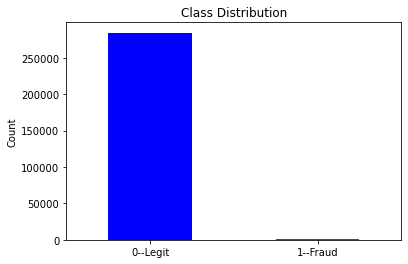

In [284]:
class_counts = data['Class'].value_counts()
class_labels = ['0--Legit', '1--Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

In [239]:
# statistical measures of data

legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [240]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [241]:
# compare the values for both transactions

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


balancing the unbalanced data

Build a sample dataset containing similar distribution of legit transaction and fraud transaction.

No.of legit transactions --- 284315

No.of fraud transactions --- 492

Randomly taking 492 sample data from 284315 legit transactions to balance the data with 492 fraud transactions data and join both the legit and fraud transactions.

In [242]:
legit_sample = legit.sample(n=492)

In [243]:
# concatenating two DataFrames
# axis=0 means rows
# axis=1 means columns

new_data = pd.concat([legit_sample, fraud], axis=0)

In [244]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
97454,66228.0,0.988617,-0.412961,0.257419,-0.088862,-0.588306,-0.496338,-0.021778,0.027533,0.008506,...,-0.079280,-0.506842,0.064342,0.254996,-0.020271,0.837375,-0.098967,0.010280,111.93,0
82411,59388.0,1.558829,-0.686182,-0.142643,-1.347034,-1.005978,-1.319676,-0.350055,-0.501227,-2.406672,...,-0.155826,0.018507,-0.098666,0.433929,0.727340,-0.088308,0.005593,0.009835,15.00,0
5992,6689.0,-0.254073,0.862468,0.751889,1.117499,2.809207,4.340815,0.108351,0.784139,0.536083,...,-0.275949,-0.381252,-0.281816,0.944541,0.231219,-0.042626,-0.125557,-0.174222,6.03,0
75168,55935.0,-1.863772,-1.274985,1.576630,-0.390122,2.017571,-1.959349,-0.445111,0.155529,-0.097956,...,0.148431,-0.049830,0.354768,0.559895,-0.447276,-0.206015,0.042903,0.204192,7.54,0
120731,75940.0,-2.593190,2.693025,-0.101475,2.356595,-0.422948,2.089724,-1.399555,2.591943,-1.654791,...,0.019986,-0.121691,0.334145,-1.435448,-0.496307,0.118463,0.261767,0.093349,3.70,0


In [245]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [246]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

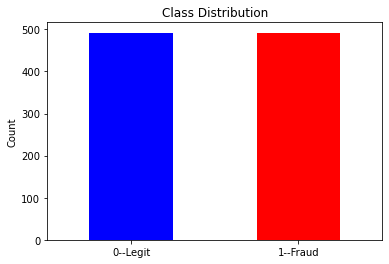

In [283]:
class_counts = new_data['Class'].value_counts()
class_labels = ['0--Legit', '1--Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

In [247]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95599.284553,0.036438,-0.073424,0.046270,-0.000918,0.124415,-0.027742,0.042185,0.031720,-0.004626,...,0.007470,0.028031,-0.021110,-0.002395,0.024577,0.014819,-0.012325,-0.000062,-0.006924,88.265630
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features and Targets

In [248]:
x = new_data.drop(columns='Class',axis=1)
y = new_data['Class']

In [249]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
97454    66228.0  0.988617 -0.412961  0.257419 -0.088862 -0.588306 -0.496338   
82411    59388.0  1.558829 -0.686182 -0.142643 -1.347034 -1.005978 -1.319676   
5992      6689.0 -0.254073  0.862468  0.751889  1.117499  2.809207  4.340815   
75168    55935.0 -1.863772 -1.274985  1.576630 -0.390122  2.017571 -1.959349   
120731   75940.0 -2.593190  2.693025 -0.101475  2.356595 -0.422948  2.089724   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [250]:
print(y)

97454     0
82411     0
5992      0
75168     0
120731    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64




split data into training data and testing data

In [251]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [252]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)




Model Training

Logistic Regression

In [253]:
model = LogisticRegression()

In [254]:
# training the Logistic Regression with training data

model.fit(x_train,y_train)

LogisticRegression()

In [255]:
# accuracy score on training data

x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [256]:
print('training_data_accuracy:',training_data_accuracy)

training_data_accuracy: 0.9491740787801779


In [257]:
# accuracy on test data

x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [258]:
print('test_data_accuracy:',test_data_accuracy)

test_data_accuracy: 0.9187817258883249


In [259]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [260]:
x_train_prediction_r = model.predict(x_train)
training_data_accuracy1 = accuracy_score(x_train_prediction_r,y_train)
print('training_data_accuracy:',training_data_accuracy1)

training_data_accuracy: 0.9491740787801779


In [261]:
x_test_prediction_r = model.predict(x_test)
test_data_accuracy1 = accuracy_score(x_test_prediction_r,y_test)
print('test_data_accuracy:',test_data_accuracy1)

test_data_accuracy: 0.9187817258883249


In [263]:
input_data = (169142,-1.927883321,1.125652664,-4.518330641,1.749292533,-1.566487292,-2.010494231,-0.882849831,0.697211109,-2.064945287,-5.587793782,2.115795177,-5.417424082,-1.235122631,-6.665176895,0.401700687,-2.897825117,-4.570529434,-1.315147214,0.391167041,1.252966735,0.778583979,-0.319188819,0.639418961,-0.29488504,0.537502536,0.788395057,0.292679966,0.147967929,390)


# change the data into numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting one data point

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print('The credit card transaction is legit')
else:
    print('The credit card transaction is fraud')

[1]
The credit card transaction is fraud
